In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly
import plotly.express as px

# 1. Análisis exploratorio
## 1.1 Integralidad de la información

In [2]:
data=pd.read_csv(r"C:\Users\Usuario\Ciencia de datos\MLPython\python-ml-course-master\datasets\titanic\titanic3.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


El primer paso que realizo es un análisis de los datos, entendiendo de manera adecuada la información que contiene cada una de als columnas, es necesario ajustar el tipo de variable de cada feature para que sea correspondiente con la naturaleza de la columna. 

En este caso, las variable pclass, correspondiente a la clase del pasajero, cuya naturaleza es categorica será cambiada a categorical, la variable survived, correspondiente a si el pasajero sobrevivió o no, cuya naturaleza es booleana, será cambiado a la misma.

Esta transformación será realizada a continuación

In [4]:
convert_dict = {'survived': bool,
                'pclass': object,
                'body': object}
data[["survived", "pclass", 'body']] = data[["survived", "pclass", 'body']].astype (convert_dict)
data[['pclass','sex','ticket', 'cabin', 'embarked', 'boat','home.dest' ]] =data[['pclass','sex','ticket', 'cabin', 'embarked', 'boat','home.dest' ]].astype("category")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   category
 1   survived   1309 non-null   bool    
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   category
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    category
 10  embarked   1307 non-null   category
 11  boat       486 non-null    category
 12  body       121 non-null    object  
 13  home.dest  745 non-null    category
dtypes: bool(1), category(7), float64(2), int64(2), object(2)
memory usage: 143.9+ KB


Además, en este punto es necesario conocer si existen datos nulos en el dataset para empezar a identificar la manera en la que deben ser tratados.

In [6]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Como se puede observar, algunas columnas tienen datos nulos, los valores faltantes en columna de edad serán reemplazados por el promedio, los registros que tienen datos faltantes en la columna fare y embarked serán eliminados, además, las columnas cabin y home.dest serán eliminadas

Por otro lado, la columna boat, correspondiente al bote salvavidas que utilizó y la columna body, correspondiente al número de cuerpo si es que fue hallado, se sospecha tienen relación directa con la supervivencia del pasajero, por lo tanto, serán reemplazados los espacios nulos con un valor que no afecte el desempeño del modelo

In [7]:
## Exploración y visualización de los primeros 50 datos
## esto se hace con el fin de comprobar la integridad de la información
data.head(50)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,True,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,True,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,False,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,False,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22,"Montevideo, Uruguay"


In [8]:
## Exploración y visualización de los últimos 50 datos
## esto se hace con el fin de comprobar la integridad de la información
data.tail(50)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1259,3,False,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,NaN,S,NaN,NaN,NaN
1260,3,True,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S,15,NaN,NaN
1261,3,True,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,15,NaN,NaN
1262,3,False,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,NaN,NaN,NaN
1263,3,False,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,NaN,S,NaN,1,NaN
1264,3,False,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,NaN,255,NaN
1265,3,False,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,NaN,NaN,NaN
1266,3,False,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN
1267,3,False,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN
1268,3,False,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,NaN,NaN,NaN


Con la finalidad de comprender con mejor profundidad nuestro problema, es importante entender que tan balanceada esta la muestra, en este caso nuestra clasificación es la supervivencia (columna "survived"), la cual puede tomar solamente valores de True y False

In [9]:
data.survived.value_counts()

False    809
True     500
Name: survived, dtype: int64

Incluso si la muestra no está lo suficientemente balanceada, parece que tenemos suficiente información de ambas categorías para que el modelo quede entrenado sin sesgo, en caso tal de que el modelo no se comporte de la manera esperada, procederemos a balancear la muestra


## 1.2 Entendiendo el sistema

Para llegar a una decisión acertada y un análisis que genere valor en el momento de tomar decisiones de negocio, es necesario entender la naturaleza del fenómeno que se está estudiando y entender como adquieren sentido los datos contextualizados en el sistema.

En este caso particular, las variables de estudio no son temporales, además pertenecientes en gran proporción a datos socio demográficos de los pasajeros y su ubicación y posición dentro de la embarcación.
El conocimiento del origen de la información y su significado nos ayuda a encaminar de manera adecuada el tratamiento de datos.

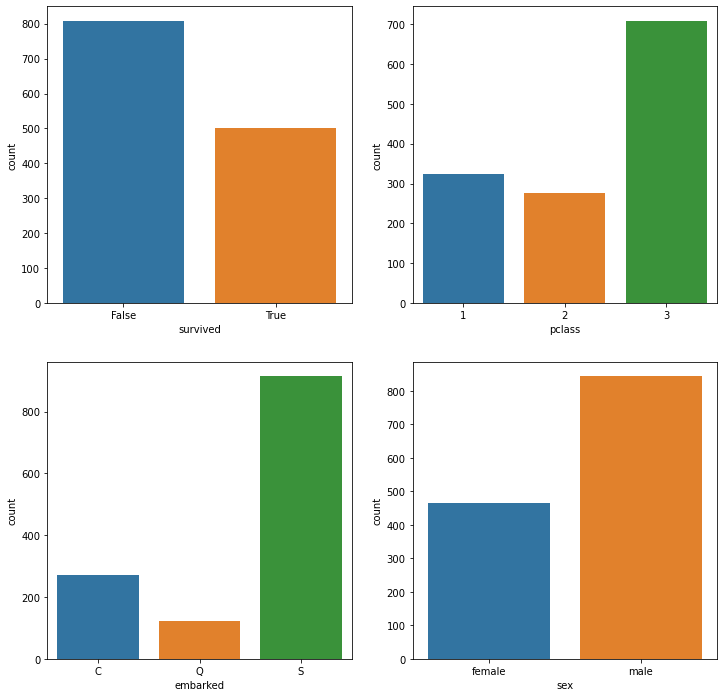

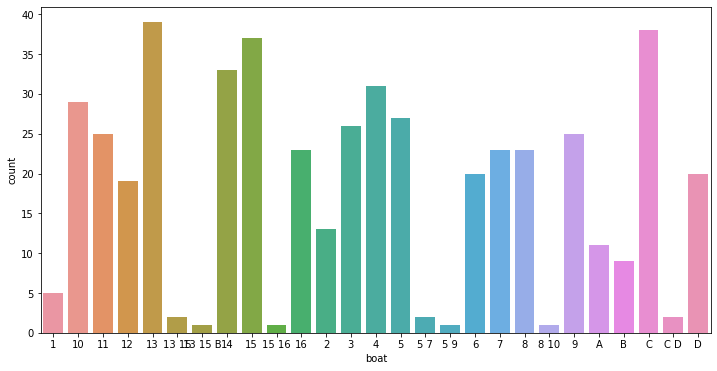

In [10]:
f, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.countplot(x= "survived", data=data, ax=axes[0,0])
sns.countplot(x="pclass", data=data, ax= axes[0,1])
sns.countplot(x="embarked", data= data, ax=axes[1,0])
sns.countplot(x="sex", data= data, ax=axes[1,1])

plt.figure(figsize=(12,6))
sns.countplot(x="boat" ,data=data)

#De esta manera añadimos un gráfico de pie en caso de necesitarlo
#clase= pd.DataFrame(data["pclass"].value_counts())
#plt.figure(figsize=(6,6))
#plt.pie((clase["pclass"]), labels=clase.index, autopct= "%1.1f%%")


En las gráficas anteriormente presentadas podemos visualizar como se distribuyen los datos en las diferentes variables categoricas que decidimos utilizar anteriormente, de esta manera podemos clarificar como estaban distribuidos los datos.

Tener conocimiento de esto es altamente importante en el momento de tratar espacios vacíos y para el tratamiento de valores atípicos.

#### Resumen diagnóstico del Dataset: 
* La información contenida en el Dataset es de buena calidad en la mayoría de las columnas, tiene pocos datos lo cual restringe la posibilidad de utilizar modelos más robustos como modelos de deep learning y técnicas de ensamblaje.
* La variable objetivo, aunque no está balanceada, tiene suficientes datos en cada categoría, en principio se hará una primera iteración del modelo con los datos tal como están, sin embargo, se intentará una mejora del rendimiento del mismo balanceando los datos
* Incluso contando solo con información categorica y sociodemografica, el Dataset no presenta valores absurdos en ninguna de las columnas anteriormente representadas (una edad de mil años, un número de familiares dentro de la embarcación demasiado grande, etc), esto se corroborará revisando a profundidad los outliers en los diagramas de caja.

# 2. Examinación estadistica
## 2.1 Descripción básica

In [11]:
#Descripción de las variables numericas
data.describe()

,age,sibsp,parch,fare
count,1046.000000,1309.000000,1309.000000,1308.000000
mean,29.881135,0.498854,0.385027,33.295479
std,14.413500,1.041658,0.865560,51.758668
min,0.166700,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


In [12]:
#Descripción de las variables categoricas
data.describe(include=["category"])

,pclass,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,3,2,929,186,3,27,369
top,3,male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,709,843,11,6,914,39,64


#### Hechos para resaltar:
* Las variables numericas presentan una dispersión considerable (mayor al 50% en todas las columnas), esto lo podemos observar y analizar en las desviaciones estándar.
* El conteo de las variables numericas es bastante homogeneo excepto por la columna body, la cual no tiene datos para los cuerpos no encontrados (la importancia del contexto de negocio), además, hay algunos valores vacíos en la columna de edad.
* Para las variables categoricas, no hay un conteo homogeneo, por lo cual, como se explico en un paso anterior, se procederá a eliminar las columnas de "cabin" y "home.dest" en aras de conseguir un modelo preciso, por el contrario, la variable boat se presume está directamente relacionada con el deceso de los tripulantes del Titanic, por lo cual será tenida en cuenta en el analisis.
* Por otro lado, las variables numericas tienen máximos y mínimos razonables, para descartar absurdos o errores relacionados con la colecta de los datos.

## 2.2 Análisis gráfico


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


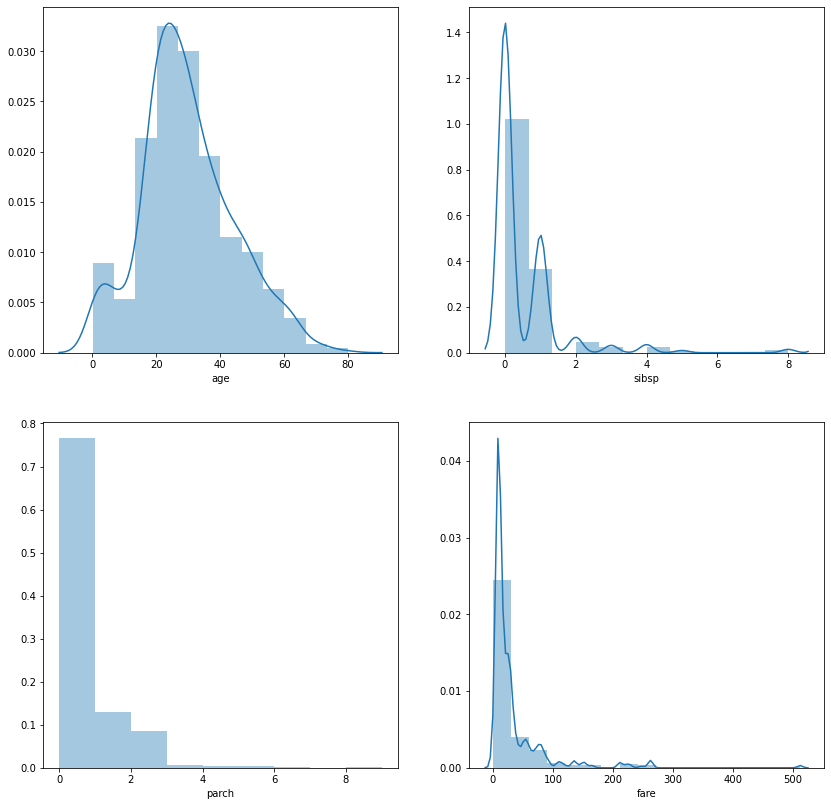

In [13]:
f, axes =plt.subplots(2, 2, figsize=(14, 14))
k=int(np.ceil(1+ np.log2(len(data))))
sns.distplot(data["age"], bins= k, kde=True, ax=axes[0,0])
sns.distplot(data["sibsp"], bins= k, kde=True, ax=axes[0,1])
sns.distplot(data["parch"], bins= 9, ax=axes[1,0])
sns.distplot(data["fare"], bins= k+5, kde=True, ax=axes[1,1])

#### Sobre las distribuciones:
* No hay valores absurdos (edades negativas, cantidades negativas o absurdamente grandes de familiares a bordo)
* Las distribuciones no tienen colas pesadas
* La distribución de hermanos y parientes a bordo está concentrada entre 0 y 2 personas en su mayoría.


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


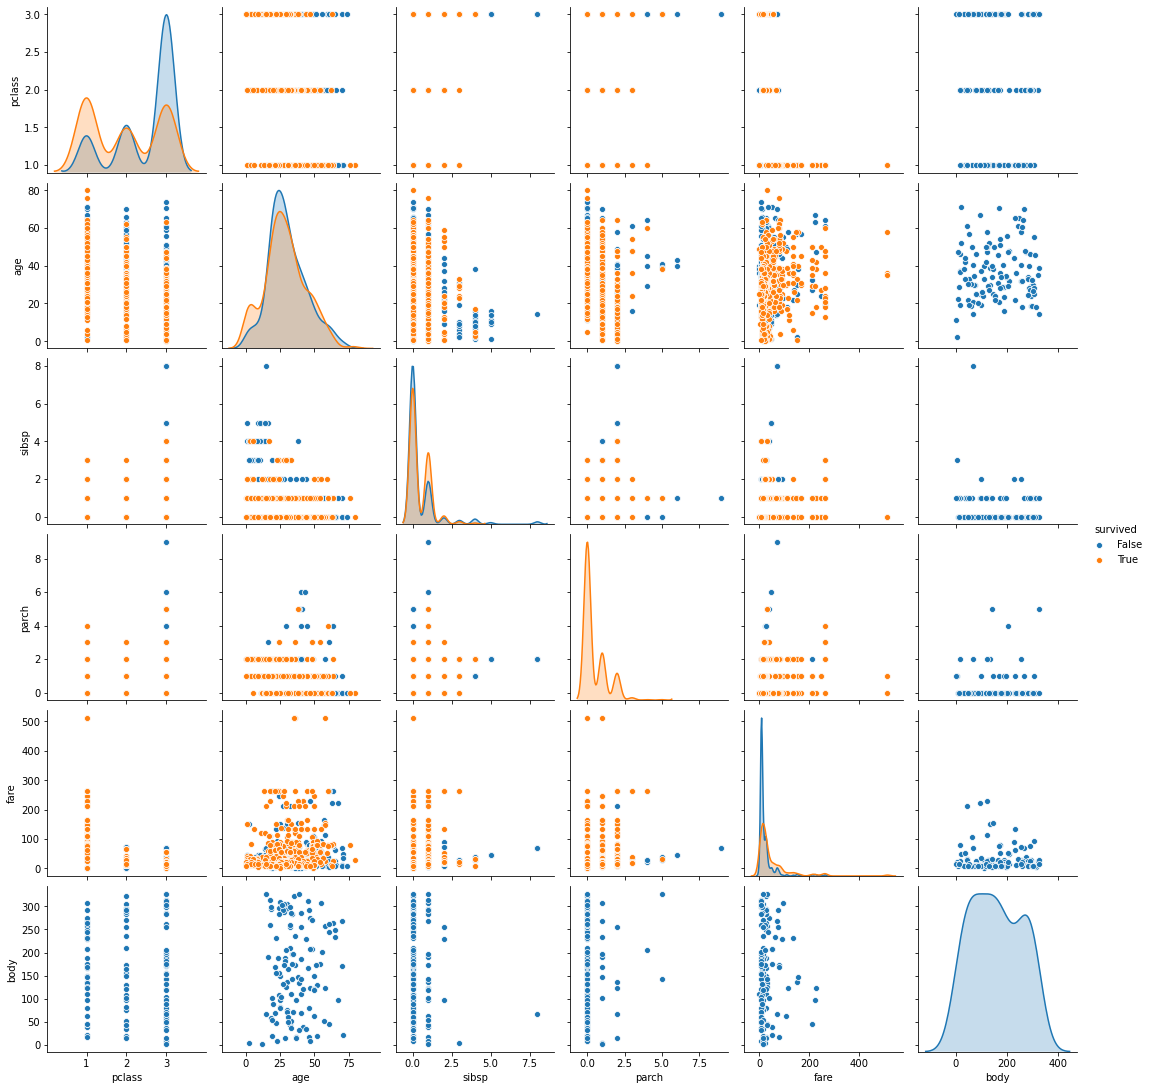

In [14]:
sns.pairplot(data= data, hue='survived')

### Sobre el análisis gráfico por estado:
* Se observa un pico particular que relaciona directamente los decesos del fenomeno con la clase en la cual iban ubicados los pasajeros, del resto de las distrubuciones se obersvan dos particularidades, la primera es que de todos los sobrevivientes, ninguno tenía padres/hijos a bordo, la segunda es que solo hay número de cuerpo para los que sobrevivieron, lo cual es completamente coherente con la naturaleza del fenómeno.
* No se observan correlaciones directas que de antemano inviten a descartar alguna variable. Aunque se examinará la correlación con más detalle más adelante para cerciorarse de que todas las variables aportan información útil.


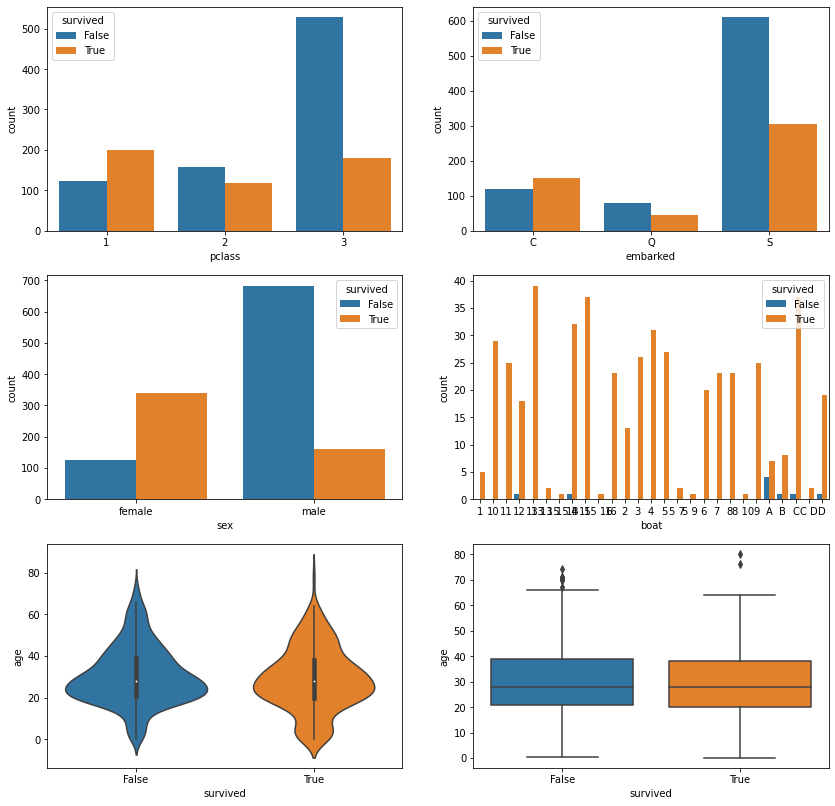

In [15]:
f, axes =plt.subplots(3, 2, figsize=(14, 14))
sns.countplot(x="pclass", data=data, hue="survived", ax=axes[0,0])
sns.countplot(x="embarked", data=data, hue="survived", ax=axes[0,1])
sns.countplot(x="sex", data=data, hue="survived", ax=axes[1,0])
sns.countplot(x="boat", data=data, hue="survived", ax=axes[1,1])
sns.violinplot(x= 'survived',y='age',data=data, ax=axes[2,0])
sns.boxplot(x= 'survived',y='age',data=data, ax=axes[2,1])


### Sobre el analisis gráfico por categorías respecto a la variable objetivo:
*  Se pued eobservar una clara relación entre el deceso de un ocupante del titanic con su sexo y la clase en la cual estaba ubicado en el barco, además de una clara relación entr el deceso y si estuvo o no en un bote salvavidas.
* Hay otra relación no tan clara entre el deceso y el puerto en el cual embarcó el pasajero.
* Como se puede observar en el gráfico de cajas, aunque existen outliers, todavía pueden ser considerados como datos que estáan dentro de un rango normal, por lo tanto, serán tenidos en cuenta para la primera iteración del modelo


* Se profundizará en el análisi anterior por medio de unas gráficas 3D


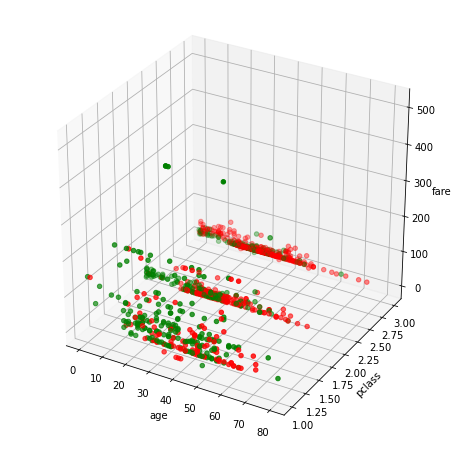

In [48]:
ax= plt.figure(figsize=(8, 8)).add_subplot(111, projection ='3d')
data['colors'] = data['survived'].replace({ True: 'g', False: 'r'})
ax.scatter(data['age'], data['pclass'], data['fare'], c=data['colors'])
ax.set_xlabel('age')
ax.set_ylabel('pclass')
ax.set_zlabel('fare')
plt.show()

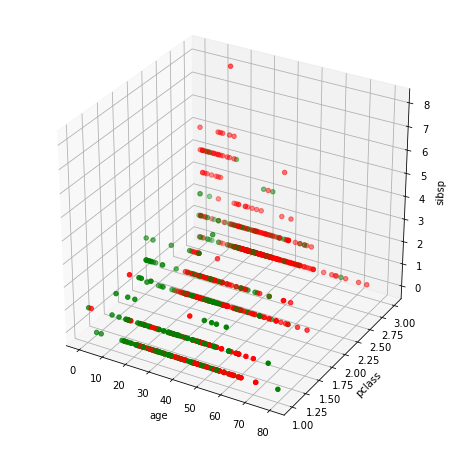

In [50]:
ax= plt.figure(figsize=(8, 8)).add_subplot(111, projection ='3d')
data['colors'] = data['survived'].replace({ True: 'g', False: 'r'})
ax.scatter(data['age'], data['pclass'], data['sibsp'], c=data['colors'])
ax.set_xlabel('age')
ax.set_ylabel('pclass')
ax.set_zlabel('sibsp')
plt.show()

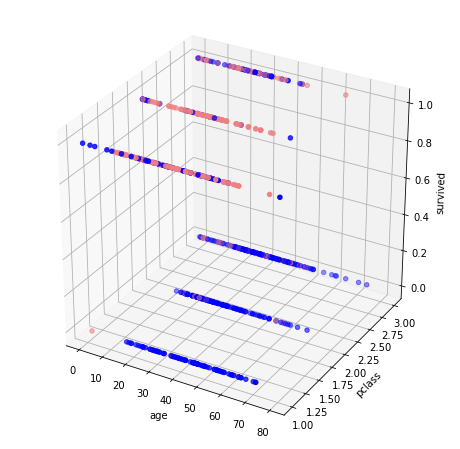

In [56]:
ax= plt.figure(figsize=(8, 8)).add_subplot(111, projection ='3d')
data['colors'] = data['sex'].replace({ "male": 'b', "female": 'lightcoral'})
ax.scatter(data['age'], data['pclass'], data['survived'], c=data['colors'])
ax.set_xlabel('age')
ax.set_ylabel('pclass')
ax.set_zlabel('survived')
plt.show()

In [40]:
plotly.offline.init_notebook_mode(connected=True)
fig = px.scatter_3d(data, x='age', y='pclass', z='fare',
              color='survived')
#fig.write_html("animacion1_3D.html")
fig.show()

In [57]:
plotly.offline.init_notebook_mode(connected=True)
fig = px.scatter_3d(data, x='age', y='pclass', z='sibsp',
              color='survived')
#fig.write_html("animacion1_3D.html")
fig.show()

In [59]:
plotly.offline.init_notebook_mode(connected=True)
fig = px.scatter_3d(data, x='age', y='pclass', z='survived',
              color='sex')
#fig.write_html("animacion1_3D.html")
fig.show()

In [60]:
plotly.offline.init_notebook_mode(connected=True)
fig = px.scatter_3d(data, x='age', y='embarked', z='sex',
              color='survived')
#fig.write_html("animacion1_3D.html")
fig.show()

#### Conclusiones analizando datos en 3D:
Analizando la distribucion de los datos se pueden plantear los tipos de clasificadores que podrían ser convenientes para el problema. Por la naturaleza de los datos es posible pensar en un modelo de árbol podría tener un buen resultadom, de igual manera un modelo que un random forest. por la naturaleza de las superficies de contacto, también se probará un modelo de SVM
